In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
lifeExpectancy = pd.read_csv("C:/Users/Administrator/kaggle/input/lifeExpectancyAtBirth.csv")
healthyLifeExpectancy = pd.read_csv("C:/Users/Administrator/kaggle/input/HALElifeExpectancyAtBirth.csv")
WhoLifeExpectancy = pd.read_csv("C:/Users/Administrator/kaggle/input/WHOregionLifeExpectancyAtBirth.csv")
healthyWhoLifeExpectancy = pd.read_csv("C:/Users/Administrator/kaggle/input/HALeWHOregionLifeExpectancyAtBirth.csv")


In [75]:
lifeExpectancy.head(10)

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21
1,Afghanistan,2019,Life expectancy at birth (years),Male,63.29
2,Afghanistan,2019,Life expectancy at birth (years),Female,63.16
3,Afghanistan,2015,Life expectancy at birth (years),Both sexes,61.65
4,Afghanistan,2015,Life expectancy at birth (years),Male,61.04
5,Afghanistan,2015,Life expectancy at birth (years),Female,62.35
6,Afghanistan,2010,Life expectancy at birth (years),Both sexes,59.94
7,Afghanistan,2010,Life expectancy at birth (years),Male,59.60
8,Afghanistan,2010,Life expectancy at birth (years),Female,60.30
9,Afghanistan,2000,Life expectancy at birth (years),Both sexes,54.99


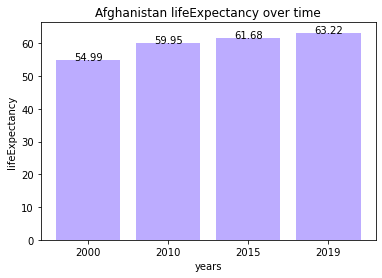

In [4]:
fliter=lifeExpectancy['Location']=="Afghanistan"
tempdata=lifeExpectancy[fliter] 
a=tempdata[["Period","First Tooltip"]].groupby("Period").mean()
a=a.reset_index()
b=a["Period"]
c=[]
for B in b:
    c.append(str(B))
fig=plt.figure()
ax1=plt.subplot2grid((1,1),(0,0))
plt.xlabel("years")
plt.ylabel("lifeExpectancy")
plt.title("Afghanistan lifeExpectancy over time")
ax1.bar(c,a["First Tooltip"],color="#bcacff")
for C in range(len(c)):
    plt.text(c[C],a["First Tooltip"].values[C],"%0.2f"%a["First Tooltip"].values[C],ha="center")

plt.show()    

In [91]:
a["First Tooltip"].values

array([54.99333333, 59.94666667, 61.68      , 63.22      ])

In [5]:
fliter=WhoLifeExpectancy["Location"]=="Africa"
tempdata=WhoLifeExpectancy[fliter]
a=tempdata[["Period",'Dim1',"First Tooltip"]].groupby("Period")
tempdata["Period"].unique()

array([2019, 2015, 2010, 2000], dtype=int64)

In [6]:
both=[]
male=[]
female=[]
years=[]
for i in tempdata["Period"].unique():
    years.append(str(i))
    both.append(a.get_group(i)["First Tooltip"].values[0])
    male.append(a.get_group(i)["First Tooltip"].values[1])
    female.append(a.get_group(i)["First Tooltip"].values[2])

In [7]:
Africa={
'Period':years,    
"both":both,
"male":male,
"female":female    
}

In [8]:
LifeExpectancy=pd.DataFrame(Africa,columns=["both","male","female"],index=Africa["Period"])

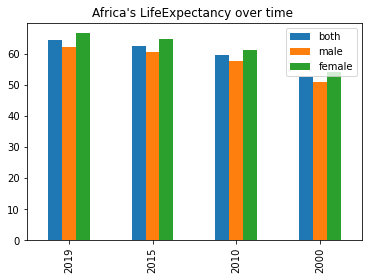

In [9]:
LifeExpectancy.plot(kind="bar")
plt.title("Africa's LifeExpectancy over time ")
#for y in range(len(years)) :
    #plt.text(years[y],both[y],str(both[y]),ha='center')
    #plt.text(years[y],male[y],str(both[y]),ha='center')
    #plt.text(years[y],female[y],str(both[y]),ha='center')   
plt.show()

In [10]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % int(height),
                ha='center', va='bottom')

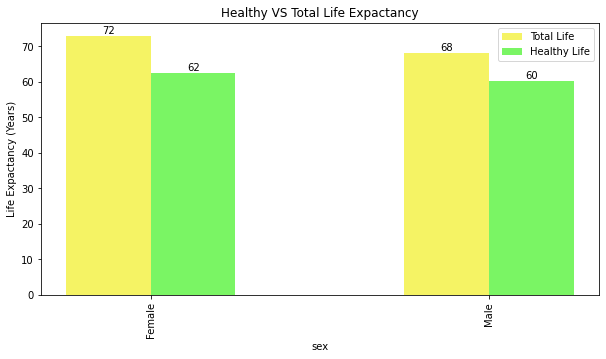

In [11]:
tempData= healthyWhoLifeExpectancy.groupby(['Dim1'])['Life expectany', 'Hale Expectency'].mean()
tempData = tempData.reset_index()
tempData.drop([0], axis = 0, inplace = True)
region = tempData.Dim1.unique().tolist()

fig = plt.figure(figsize=(10,5))
x_index = np.arange(len(region))
width = 0.25
ax = plt.subplot2grid((1,1),(0,0))
ract1 = ax.bar(x_index-width/2, tempData['Life expectany'], width = width, color='#f5f364')
ract2 = ax.bar(x_index+width/2, tempData['Hale Expectency'], width = width, color='#7af564')
plt.xticks(x_index, labels=region)
plt.xticks(rotation = 90)
plt.xlabel("sex")
plt.ylabel("Life Expactancy (Years)")
plt.title("Healthy VS Total Life Expactancy")
plt.legend(['Total Life', 'Healthy Life'])

autolabel(ract1)
autolabel(ract2)
    
plt.show()

In [3]:
tempdata=WhoLifeExpectancy.groupby(["Location","Dim1"])["First Tooltip"].mean()

In [11]:
tempdata=tempdata.reset_index()

In [17]:
region=tempdata["Location"].unique()

In [14]:
dataM=tempdata[tempdata["Dim1"]=="Male"]["First Tooltip"]
dataF=tempdata[tempdata["Dim1"]=="Female"]["First Tooltip"]

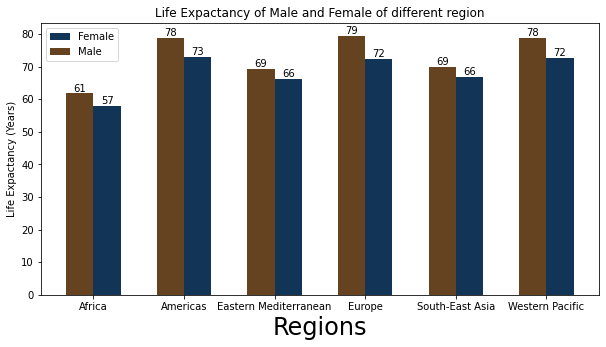

In [31]:
fig = plt.figure(figsize=(10,5))
x_index=np.arange(len(region))
width=0.3
ax=plt.subplot2grid((1,1),(0,0))
M=ax.bar(x_index+width/2,dataM,width=width,color="#123456")
F=ax.bar(x_index-width/2,dataF,width=width,color="#654321")
plt.xticks(x_index,labels=region)
plt.xlabel("Regions",size=24)
plt.ylabel("Life Expactancy (Years)")
plt.title("Life Expactancy of Male and Female of different region")
plt.legend(['Female', 'Male'])

autolabel(M)
autolabel(F)

plt.show()

In [9]:
def get_region_data(region):
    F=WhoLifeExpectancy[(WhoLifeExpectancy["Location"]==region) & (WhoLifeExpectancy["Dim1"]=="Female")]
    M=WhoLifeExpectancy[(WhoLifeExpectancy["Location"]==region) & (WhoLifeExpectancy["Dim1"]=="Male")]
    B=WhoLifeExpectancy[(WhoLifeExpectancy["Location"]==region) & (WhoLifeExpectancy["Dim1"]=="Both sexes")]
    return F,M,B
    

In [ ]:
AfricaF,AfricaM,AfricaB=get_region_data("Africa") 
AmericasF,AmericasM,AmericasB=get_region_data("Americas") 
South-East-AsiaF,South-East-AsiaM,South-East-AsiaB=get_region_data("South-East Asia") 
EuropeF,EuropeM,EuropeB=get_region_data("Europe")

In [29]:
Africa=get_region_data("Africa") 
Americas=get_region_data("Americas")
SouthEastAsia=get_region_data("South-East Asia")
Europe=get_region_data("Europe")
EasternMediterranean=get_region_data("Eastern Mediterranean")
WesternPacific=get_region_data("Western Pacific")

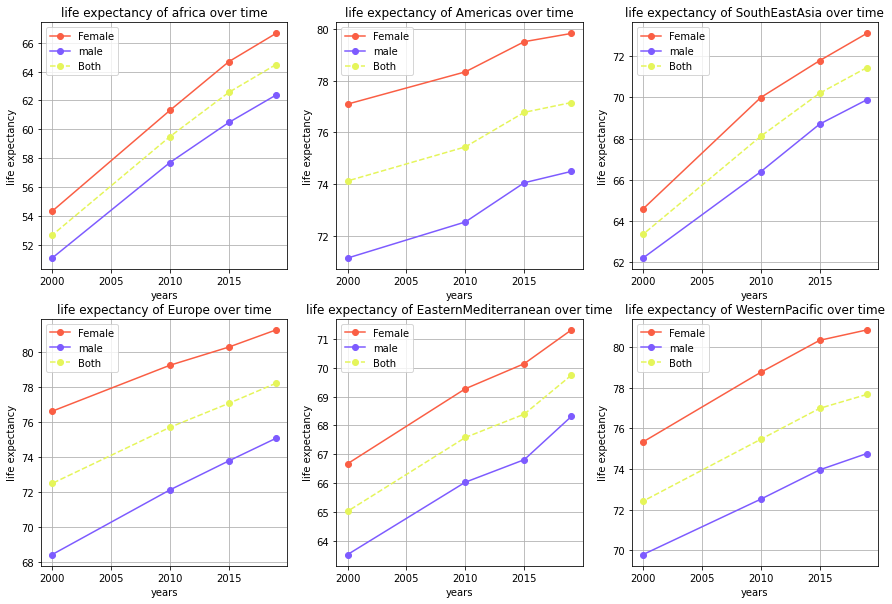

In [37]:
fig=plt.figure(figsize=(15,10))
ax1=plt.subplot2grid((2,3),(0,0),rowspan=1, colspan=1)
plt.xlabel("years")
plt.ylabel("life expectancy")
plt.title("life expectancy of africa over time")
ax1.plot(Africa[0]["Period"],Africa[0]["First Tooltip"],marker="o",color="#FA5E44",label="Female")
ax1.plot(Africa[1]["Period"],Africa[1]["First Tooltip"],marker="o",color="#7D5BFF",label="male")
ax1.plot(Africa[2]["Period"],Africa[2]["First Tooltip"],marker="o",color="#E5F55A",label="Both",linestyle="--")
ax1.legend()
plt.grid(True)

ax2=plt.subplot2grid((2,3),(0,1),rowspan=1, colspan=1)
plt.xlabel("years")
plt.ylabel("life expectancy")
plt.title("life expectancy of Americas over time")
ax2.plot(Americas[0]["Period"],Americas[0]["First Tooltip"],marker="o",color="#FA5E44",label="Female")
ax2.plot(Americas[1]["Period"],Americas[1]["First Tooltip"],marker="o",color="#7D5BFF",label="male")
ax2.plot(Americas[2]["Period"],Americas[2]["First Tooltip"],marker="o",color="#E5F55A",label="Both",linestyle="--")
ax2.legend()
plt.grid(True)

ax3=plt.subplot2grid((2,3),(0,2),rowspan=1, colspan=1)
plt.xlabel("years")
plt.ylabel("life expectancy")
plt.title("life expectancy of SouthEastAsia over time")
ax3.plot(Americas[0]["Period"],SouthEastAsia[0]["First Tooltip"],marker="o",color="#FA5E44",label="Female")
ax3.plot(Americas[1]["Period"],SouthEastAsia[1]["First Tooltip"],marker="o",color="#7D5BFF",label="male")
ax3.plot(Americas[2]["Period"],SouthEastAsia[2]["First Tooltip"],marker="o",color="#E5F55A",label="Both",linestyle="--")
ax3.legend()
plt.grid(True)

ax4=plt.subplot2grid((2,3),(1,0),rowspan=1, colspan=1)
plt.xlabel("years")
plt.ylabel("life expectancy")
plt.title("life expectancy of Europe over time")
ax4.plot(Americas[0]["Period"],Europe[0]["First Tooltip"],marker="o",color="#FA5E44",label="Female")
ax4.plot(Americas[1]["Period"],Europe[1]["First Tooltip"],marker="o",color="#7D5BFF",label="male")
ax4.plot(Americas[2]["Period"],Europe[2]["First Tooltip"],marker="o",color="#E5F55A",label="Both",linestyle="--")
ax4.legend()
plt.grid(True)

ax5=plt.subplot2grid((2,3),(1,1),rowspan=1, colspan=1)
plt.xlabel("years")
plt.ylabel("life expectancy")
plt.title("life expectancy of EasternMediterranean over time")
ax5.plot(Americas[0]["Period"],EasternMediterranean[0]["First Tooltip"],marker="o",color="#FA5E44",label="Female")
ax5.plot(Americas[1]["Period"],EasternMediterranean[1]["First Tooltip"],marker="o",color="#7D5BFF",label="male")
ax5.plot(Americas[2]["Period"],EasternMediterranean[2]["First Tooltip"],marker="o",color="#E5F55A",label="Both",linestyle="--")
ax5.legend()
plt.grid(True)

ax6=plt.subplot2grid((2,3),(1,2),rowspan=1, colspan=1)
plt.xlabel("years")
plt.ylabel("life expectancy")
plt.title("life expectancy of WesternPacific over time")
ax6.plot(Americas[0]["Period"],WesternPacific[0]["First Tooltip"],marker="o",color="#FA5E44",label="Female")
ax6.plot(Americas[1]["Period"],WesternPacific[1]["First Tooltip"],marker="o",color="#7D5BFF",label="male")
ax6.plot(Americas[2]["Period"],WesternPacific[2]["First Tooltip"],marker="o",color="#E5F55A",label="Both",linestyle="--")
ax6.legend()
plt.grid(True)


plt.show()

In [42]:
tempdata=lifeExpectancy[lifeExpectancy["Dim1"]=="Both sexes"].groupby("Location")["First Tooltip"].max()

In [176]:
top20=tempdata.sort_values(ascending=False)[:20]
low20=tempdata.sort_values()[:20]
top20=top20.reset_index()
low20=low20.reset_index()
low20=low20.reindex(index=low20.index[::-1])
yeartop=[]
yearlow=[]
for top in range(0,20):
    yeartop.append(lifeExpectancy[(lifeExpectancy["Location"]==top20["Location"][top])&(lifeExpectancy["First Tooltip"]==top20["First Tooltip"][top])]["Period"])
for low in range(0,20):
    yearlow.append(lifeExpectancy[(lifeExpectancy["Location"]==low20["Location"][low])&(lifeExpectancy["First Tooltip"]==low20["First Tooltip"][low])]["Period"])    
#可以透過for迴圈看出幾乎所有的值都是取到2019年 可以證實人的預期壽命是不斷在上升

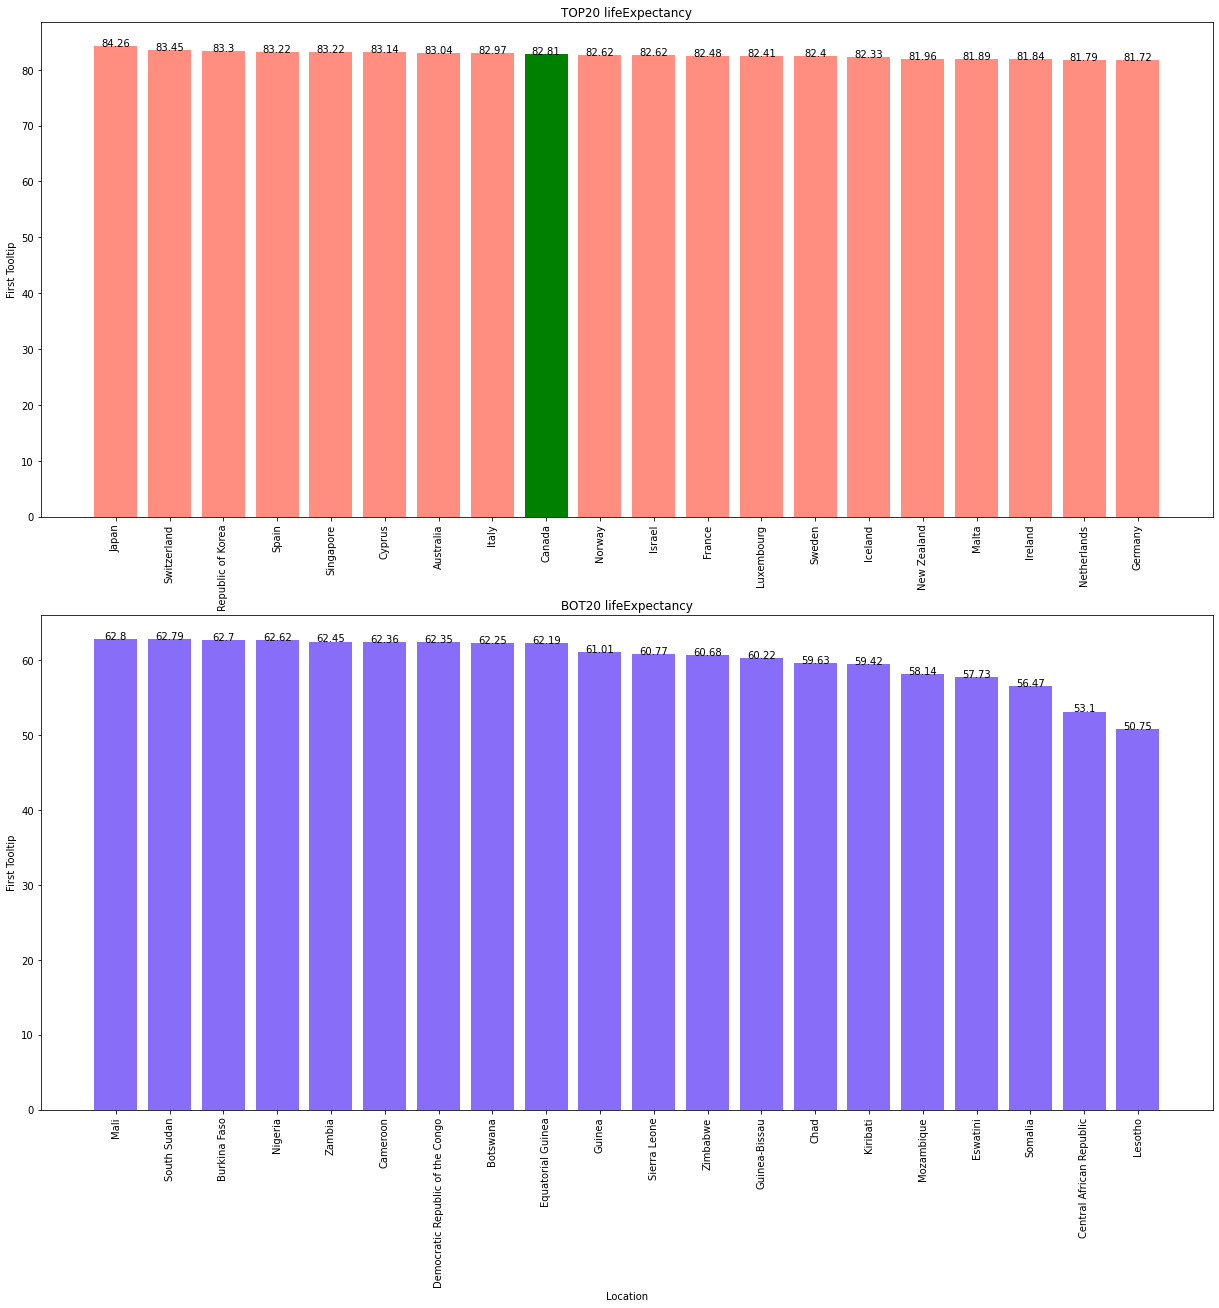

In [163]:

fig=plt.figure(figsize=(21,20))
ax1color=[]
ax1=plt.subplot2grid((2,1),(0,0),rowspan=1, colspan=1)
plt.xlabel("Location")
plt.ylabel("First Tooltip")
plt.title("TOP20 lifeExpectancy")
for i in range(0,20):
    if 2019 in yeartop[i].values:
        ax1color.append("#FF8E80")
    else:
        ax1color.append("green")
ax1.bar(top20["Location"],top20["First Tooltip"],color=ax1color)
plt.xticks(rotation = 90)
for i in range(0,20):
    plt.text(top20["Location"][i],top20["First Tooltip"][i],top20["First Tooltip"][i],ha="center")

ax2color=[]    
ax2=plt.subplot2grid((2,1),(1,0),rowspan=1, colspan=1)
plt.xlabel("Location")
plt.ylabel("First Tooltip")
plt.title("BOT20 lifeExpectancy")
for i in range(0,20):
    if 2019 in yearlow[i].values:
        ax2color.append("#876DF7")
    else:
        ax2color.append("green")
ax2.bar(low20["Location"],low20["First Tooltip"],color=ax2color)
plt.xticks(rotation = 90)
for i in range(0,20):
    plt.text(low20["Location"][i],low20["First Tooltip"][i],low20["First Tooltip"][i],ha="center")

fig.show()

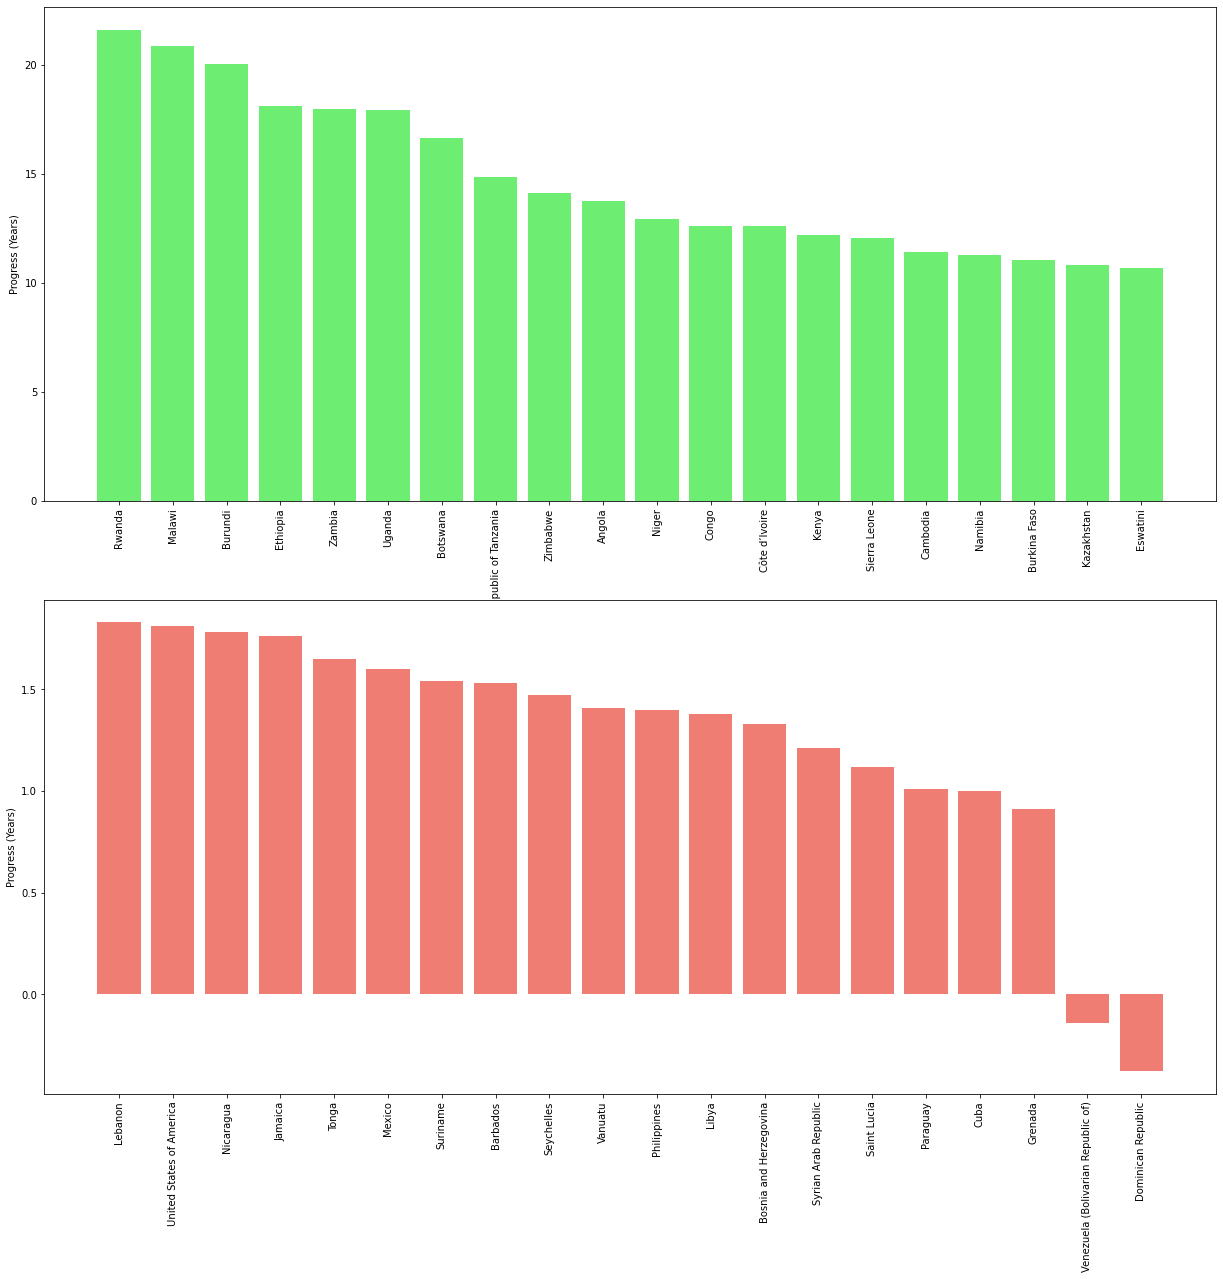

In [182]:
tempData2000 = lifeExpectancy[(lifeExpectancy['Period'] == 2000) & (lifeExpectancy['Dim1'] == "Both sexes")]
tempData2019 = lifeExpectancy[(lifeExpectancy['Period'] == 2019) & (lifeExpectancy['Dim1'] == "Both sexes")]
tempData2000.reset_index(inplace = True)
tempData2019.reset_index(inplace = True)
tempData = tempData2000.join(tempData2019, lsuffix = "_00", rsuffix="_19")
tempData['progress'] = tempData['First Tooltip_19'] - tempData['First Tooltip_00']
tempDataTrimmed = tempData[['Location_00', 'progress']]
tempDataTrimmed.sort_values(by=['progress'], ascending=False, inplace=True)
tempDataTrimmedTop = tempDataTrimmed[:20].copy()
tempDataTrimmedBot = tempDataTrimmed[-20:].copy()

fig = plt.figure(figsize=(21,20))

ax1 = plt.subplot2grid((2,1), (0,0), rowspan=1, colspan=1)
ax1.bar(x=tempDataTrimmedTop['Location_00'], height=tempDataTrimmedTop['progress'], color = "#6ded71")
ax1.set_xticklabels(tempDataTrimmedTop['Location_00'], rotation=90)
ax1.set_ylabel("Progress (Years)")

ax2 = plt.subplot2grid((2,1), (1,0), rowspan=1, colspan=1)
ax2.bar(x=tempDataTrimmedBot['Location_00'], height=tempDataTrimmedBot['progress'], color = "#f07d73")
ax2.set_xticklabels(tempDataTrimmedBot['Location_00'], rotation=90)
ax2.set_ylabel("Progress (Years)")


plt.show()

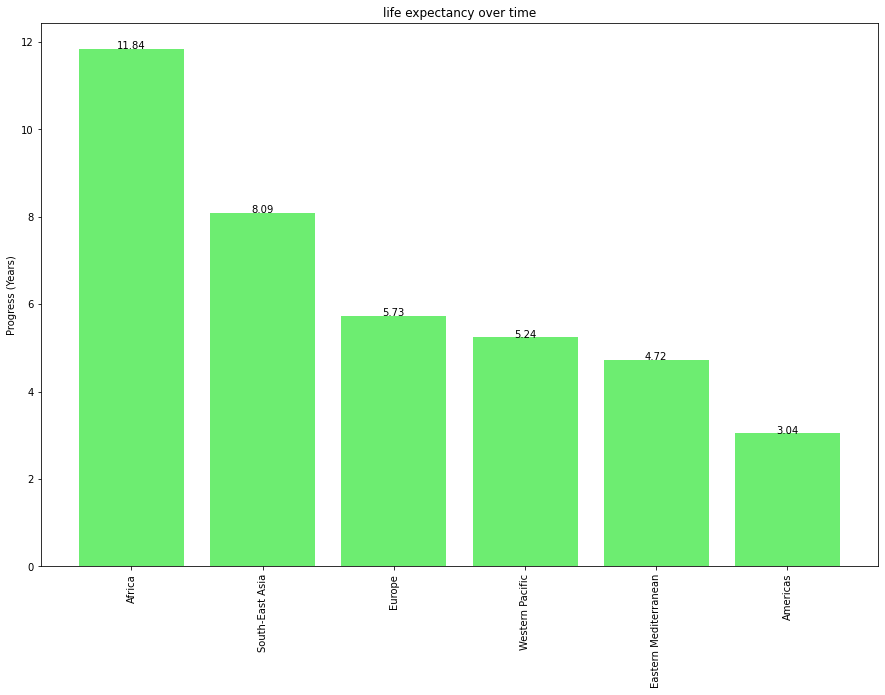

In [21]:
tempData2000 = WhoLifeExpectancy[(WhoLifeExpectancy['Period'] == 2000) & (WhoLifeExpectancy['Dim1'] == "Both sexes")]
tempData2019 = WhoLifeExpectancy[(WhoLifeExpectancy['Period'] == 2019) & (WhoLifeExpectancy['Dim1'] == "Both sexes")]
tempData2000.reset_index(inplace = True)
tempData2019.reset_index(inplace = True)
tempData = tempData2000.join(tempData2019, lsuffix = "_00", rsuffix="_19")
tempData['progress'] = tempData['First Tooltip_19'] - tempData['First Tooltip_00']
tempDataTrimmed = tempData[['Location_00', 'progress']]
tempDataTrimmed.sort_values(by=['progress'], ascending=False, inplace=True)
fig = plt.figure(figsize=(15,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
ax1.bar(x=tempDataTrimmed['Location_00'], height=tempDataTrimmed['progress'], color = "#6ded71")
ax1.set_xticklabels(tempDataTrimmed['Location_00'], rotation=90)
ax1.set_ylabel("Progress (Years)")
plt.title("life expectancy over time")
for i in range(0,6):
    plt.text(tempDataTrimmed["Location_00"][i],tempDataTrimmed["progress"][i],"%0.2f"%tempDataTrimmed["progress"][i],ha="center")

plt.show()




In [ ]:
fig = plt.figure(figsize=(21,20))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
ax1.bar(x=tempDataTrimmedTop['Location_00'], height=tempDataTrimmedTop['progress'], color = "#6ded71")
ax1.set_xticklabels(tempDataTrimmedTop['Location_00'], rotation=90)
ax1.set_ylabel("Progress (Years)")

plt.show()